In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/MyDrive/training 2.zip" /content/

In [ ]:
!unzip "/content/training 2.zip"

Archive:  /content/training 2.zip
   creating: training 2/
   creating: training 2/NotOk/
  inflating: training 2/NotOk/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/training 2/
   creating: __MACOSX/training 2/NotOk/
  inflating: __MACOSX/training 2/NotOk/._.DS_Store  
   creating: training 2/NotOk/Cart_obstacles/
  inflating: training 2/NotOk/Cart_obstacles/carts_obstacles2_2.jpg  
   creating: __MACOSX/training 2/NotOk/Cart_obstacles/
  inflating: __MACOSX/training 2/NotOk/Cart_obstacles/._carts_obstacles2_2.jpg  
  inflating: training 2/NotOk/Cart_obstacles/carts_obstacles4_4.jpg  
  inflating: __MACOSX/training 2/NotOk/Cart_obstacles/._carts_obstacles4_4.jpg  
  inflating: training 2/NotOk/Cart_obstacles/obstacles2_6.jpg  
  inflating: __MACOSX/training 2/NotOk/Cart_obstacles/._obstacles2_6.jpg  
  inflating: training 2/NotOk/Cart_obstacles/carts_obstacles4_5.jpg  
  inflating: __MACOSX/training 2/NotOk/Cart_obstacles/._carts_obstacles4_5.jpg  
  inflating: training 2/N

In [ ]:
!mkdir dataset

In [ ]:
!cp -r "/content/training 2/Ok" dataset

In [ ]:
!mkdir dataset/NotOk

In [ ]:
import glob
import shutil
import os

BASE_DIR = os.getcwd()
src_dir = os.path.join(BASE_DIR, "training 2","NotOk")
dst_dir =  os.path.join(BASE_DIR, "dataset", "NotOk")


In [ ]:
not_ok_folder = os.listdir(src_dir)

In [ ]:
for item in not_ok_folder:
  for jpgfile in glob.iglob(os.path.join(src_dir, item,"*.jpg")):
      shutil.copy(jpgfile, dst_dir)

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders  # or import split_folders
import shutil

In [ ]:
DATA_DIR = os.path.join(BASE_DIR, "dataset")

In [ ]:
!mkdir "all_data"

In [ ]:
dataset_dir = os.path.join(BASE_DIR, 'all_data')

In [ ]:
splitfolders.ratio(DATA_DIR, output= dataset_dir, seed=1337, ratio=(.7, .1, .2)) # default values


Copying files: 226 files [00:00, 5248.83 files/s]


In [ ]:
train_directory = os.path.join(dataset_dir, 'train')
valid_directory = os.path.join(dataset_dir, 'val')
test_directory = os.path.join(dataset_dir, 'test')

In [ ]:


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
import numpy as np
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim import lr_scheduler



In [ ]:
#print the pytorch version
device = torch.cuda.is_available()
device, torch.__version__

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    
print(train_on_gpu)

CUDA is available!  Training on GPU ...
True


In [ ]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

In [ ]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(train_directory, transform=train_transforms)
valid_data = datasets.ImageFolder(valid_directory, transform=test_transforms)
test_data = datasets.ImageFolder(test_directory, transform=test_transforms)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True)

In [ ]:
len(train_data), len(valid_data),len(train_loader),len(valid_loader), len(test_data), len(test_loader)

(157, 22, 10, 2, 47, 3)

In [ ]:
model = models.resnet34(pretrained=True)
# Freeze the weights
for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
num_inp = model.fc.in_features
model.fc = nn.Linear(num_inp, 2)
if train_on_gpu:
    model.cuda()

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
#only train the classifier part, the features part are frozen
optimizer = optim.SGD(model.fc.parameters(), lr=0.015, momentum=0.9)

In [ ]:
scheduler = lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

In [ ]:
for param in model.parameters():
    param.requires_grad = True
    
# train the WHOLE part instead of just the classifier!, THIS IS THE SECOND ITERATION OF THE TRAINING AND REDUCE THE LEARNING RATE TOO!
optimizer = optim.SGD(model.parameters(), lr=0.0002, momentum=0.9)

In [ ]:
if train_on_gpu:
    model.cuda()
n_epochs = 16 # you may increase this number to train a final model
valid_loss_min = np.Inf # track change in validation loss

#Keep track for the plt chart
train_losses, test_losses = [], []

for epoch in range(1, n_epochs):
    #keep track on the learning rate and update the learning rate with specific gamma based on the step size of epoch, learning rate annealing
    scheduler.step()
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    running_corrects = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        # this loop will iterate 410x (total train images = 6552 / 16 batch size)
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #set gradien calculation on during training phase
        torch.set_grad_enabled(True)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()
        #print('train_loss_acc:',train_loss,tracktrainnum)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        #set gradien calculation off during validation phase
        torch.set_grad_enabled(False)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        #calculate preds for accuracy metrics
        _, preds = torch.max(output, 1)
        
        # update average validation loss 
        valid_loss += loss.item()
        #update running validation accuracy
        running_corrects += torch.sum(preds == target.data)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    epoch_acc = running_corrects.double() /len(valid_loader.dataset)
    
    #to track the train loss and put all the values in a list to be displayed
    train_losses.append(train_loss)
    test_losses.append(valid_loss)
    
    # print training/validation statistics 
    print('Epoch: {}-{} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}\tValidation Accuracy: {:.6f}'.format(
        epoch, n_epochs, train_loss, valid_loss, epoch_acc))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss
        
print('STARTING THE SECOND ITERATION WITH UNFREEZING THE WHOLE LAYER AND STARTING WITH A SMALLER LEARNING RATE')
#DOING THE SECOND ITERATION WITH UNFREEZING THE WHOLE LAYER INSTEAD OF JUST THE FC(CLASSIFIER) LAYER AND START AT A SMALLER LEARNING RATE 
#TO UNFREEZE THE WEIGHTS FOR THE SECOND TIME TRAINING AND DON'T FORGET TO CHANGE THE OPTIMIZER TOO!
for param in model.parameters():
    param.requires_grad = True
    
# train the WHOLE part instead of just the classifier!, THIS IS THE SECOND ITERATION OF THE TRAINING AND REDUCE THE LEARNING RATE TOO!
optimizer = optim.SGD(model.parameters(), lr=0.0002, momentum=0.9)

n_epochs = 16 # you may increase this number to train a final model

for epoch in range(1, n_epochs):
    #keep track on the learning rate and update the learning rate with specific gamma based on the step size of epoch, learning rate annealing
    scheduler.step()
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    running_corrects = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        # this loop will iterate 410x (total train images = 6552 / 16 batch size)
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #set gradien calculation on during training phase
        torch.set_grad_enabled(True)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()
        #print('train_loss_acc:',train_loss,tracktrainnum)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        #set gradien calculation off during validation phase
        torch.set_grad_enabled(False)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        #calculate preds for accuracy metrics
        _, preds = torch.max(output, 1)
        
        # update average validation loss 
        valid_loss += loss.item()
        #update running validation accuracy
        running_corrects += torch.sum(preds == target.data)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    epoch_acc = running_corrects.double() /len(valid_loader.dataset)
    
    #to track the train loss and put all the values in a list to be displayed
    train_losses.append(train_loss)
    test_losses.append(valid_loss)
    
    # print training/validation statistics 
    print('Epoch: {}-{} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}\tValidation Accuracy: {:.6f}'.format(
        epoch, n_epochs, train_loss, valid_loss, epoch_acc))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,valid_loss))
        torch.save(model.state_dict(), 'model_cifar_resnet152.pt')
        valid_loss_min = valid_loss


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Epoch: 1-16 	Training Loss: 0.038349 	Validation Loss: 0.053804	Validation Accuracy: 0.772727
Validation loss decreased (inf --> 0.053804).  Saving model ...
Epoch: 2-16 	Training Loss: 0.028259 	Validation Loss: 0.032501	Validation Accuracy: 0.772727
Validation loss decreased (0.053804 --> 0.032501).  Saving model ...
Epoch: 3-16 	Training Loss: 0.021466 	Validation Loss: 0.018027	Validation Accuracy: 0.954545
Validation loss decreased (0.032501 --> 0.018027).  Saving model ...
Epoch: 4-16 	Training Loss: 0.017044 	Validation Loss: 0.013289	Validation Accuracy: 1.000000
Validation loss decreased (0.018027 --> 0.013289).  Saving model ...
Epoch: 5-16 	Training Loss: 0.013710 	Validation Loss: 0.012677	Validation Accuracy: 1.000000
Validation loss decreased (0.013289 --> 0.012677).  Saving model ...
Epoch: 6-16 	Training Loss: 0.012081 	Validation Loss: 0.009042	Validation Accuracy: 1.000000
Validation loss decreased (0.012677 --> 0.009042).  Saving model ...
Epoch: 7-16 	Training Loss:

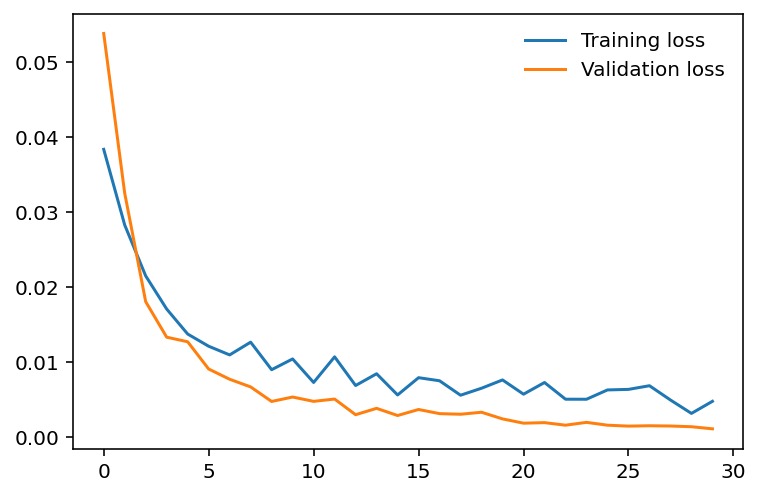

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [ ]:
model.load_state_dict(torch.load('model_cifar_resnet152.pt'))

<All keys matched successfully>

In [ ]:
test_loader.dataset

Dataset ImageFolder
    Number of datapoints: 47
    Root location: /content/all_data/test
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    inp = inp.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    inp = np.clip(inp, 0, 1)
    
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

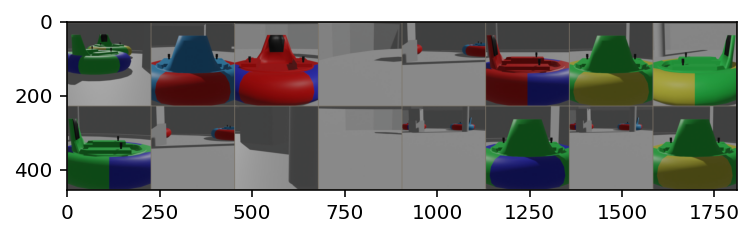

In [ ]:
# Get a batch of training data
inputs, classes = next(iter(test_loader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs,nrow=8)

imshow(out)

In [ ]:
import PIL

In [ ]:
from PIL import Image

In [ ]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    image = Image.open(image)
    image = image.convert("RGB")
    image = test_transforms(image)
    image = image.unsqueeze(0)
    return image

In [ ]:


def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
        fig.suptitle(title, fontsize=20)

    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = np.array (image)
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    #image = np.multiply (std, image) + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [ ]:
img = process_image("/content/dataset/Ok/nothing3_1.jpg")

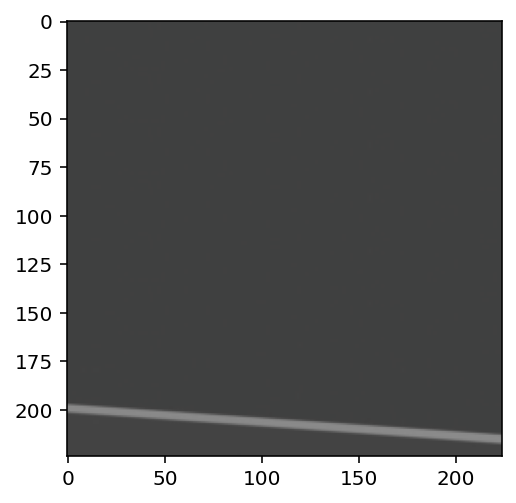

In [ ]:
imshow(img[0])

In [ ]:
classes_names = ["NotOk" , "Ok"]


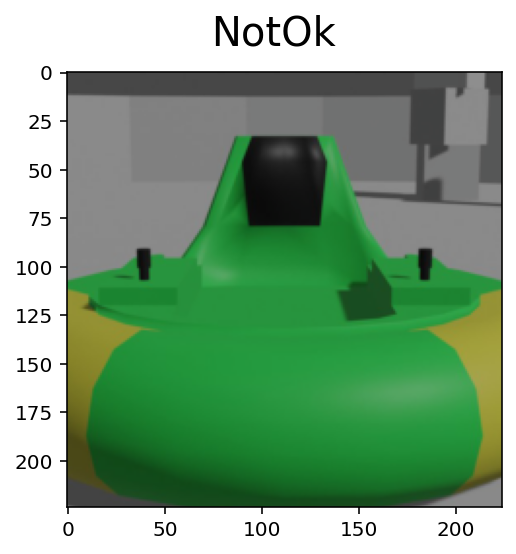

In [ ]:
file_path = '/content/training 2/NotOk/Lime_yellow_Cart/TorusCart_lime_yellow_front1.jpg' #an example from test set

img = process_image (file_path)
img = img
data = img.cuda()

output = model.forward(data)
_, preds = torch.max(output, 1)
label = classes_names[preds.item()]
        
imshow (img[0], title=label)


plt.show()



